## Part 2: Introduction to Neural Networks (Liza).

### <span style="color:coral">NumPy</span>

Neural Nets require a lot of matrix operations. NumPy allows to work with tensors efficiently. It is important for us to look at it now (also for better understanding of the popular tool -  TensorFlow).

**Tensor** is a generalizaion of a matrix, same as a matrix is a generalization of a vector, and a vector is a generalization of a scalar.


#### Examples:

Scalar is **0**-dimensional tensor:
$$a = \begin{pmatrix}a \end{pmatrix}$$

Vector is **1**-dimensional tensor:
$$v = \begin{pmatrix}a \\ b \end{pmatrix}$$

Matrix is **2**-dimensional tensor:
$$m = \begin{pmatrix}a & b\\\ c & d\end{pmatrix}$$

Tensor is an **n**-dimensional numerical object.

$$t = \begin{pmatrix} \begin{pmatrix}a & b\\\ c & d\end{pmatrix}, \begin{pmatrix}e & f\\\ g & h\end{pmatrix}, \begin{pmatrix}i & j\\\ k & l\end{pmatrix} \end{pmatrix}$$


#### Dimentionality
is the number of indices which we need to know to extract one number out of a tensor:
$$a=a$$

$$a=v[1]$$

$$a=m[1,1]$$

In NumPy <span style="color:magenta">ndarray</span> allows us to work with tensors:

In [2]:
import numpy as np
a = np.array(1)
v = np.array([1,2,3])
m = np.array([[1,2,3], [4,5,6]])
t = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(a.shape)
print(v.shape)
print(m.shape)
print(t.shape)


()
(3,)
(2, 3)
(2, 2, 3)


#### NumPy data types 

are wider than that of Python. 

For instance, instead of **float** one can opt for **float16**, **float32**, **float64**.

More details [here](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html).

In [3]:
type(v[0])

numpy.int64

#### Operations in NumPy

- addition of a scalar

In [4]:
v += 5
print(v)

[6 7 8]


- multiplication by a scalar

In [5]:
m *=0
print(m)

[[0 0 0]
 [0 0 0]]


- dot product

In [6]:
print(np.dot(v, v))

149


When can the dot product of two vectors be useful for NLP? If there is a way to represent each text as a vector of a fixed length, we can measure the distance between two given texts/vectors, for instance, with cosine:
$$\cos(v1,v2)=\frac{(v1,v2)}{\vert v1 \vert * \vert v2\vert} $$

- matrix multiplication

In [8]:
m = np.array([[1,2], [3,4]])
print(np.matmul(m, m))
print(np.dot(m, m))

[[ 7 10]
 [15 22]]
[[ 7 10]
 [15 22]]


- element-wise matrix multiplication

In [9]:
print(m*m)
print(np.multiply(m, m))

[[ 1  4]
 [ 9 16]]
[[ 1  4]
 [ 9 16]]


- matrix transpose

In [10]:
print(m.T)

[[1 3]
 [2 4]]


#### Documentation

http://www.numpy.org/

### <span style="color:coral">Some Machine Learning concepts</span>
   * Learning  = improving with experience at some task: 
     * improve at task T, 
     * with respect to performance measure P, 
     * based on experience E.


   * Types of ML tasks:
     * Supervised (labeled data)
       * Classification (categorical data)
       * Regression (continuous data)
     * Unsupervised (not labeled data)
       * Clustering

   * Typical workflow: 
        * get and prepare data, 
        * training, 
        * validation, 
        * repeat training-validation.
   * Loss function
   * Regularization

### <span style="color:coral">Neural Networks and Deep Learning</span>

**Neural networks** are great approxiamtors of non-linear functions. For instance they are able to find non-linear multidimentional boundaries in the context of classification.

The building block of a neural net is **perceptron**:

![alt text](pics/perceptron.png)


Here $x_1, ..., x_n$ are **input features**, $b$ is the **bias** and $W$ denotes the **weights**.

The node is activated via an **activation function**, depending on the linear combinaton $x^{T}W+b:$
$$ y=\phi(x^{T}W+b).$$

**Deep Learning** is the study of artificial neural networks containing more than one layer.

Feedforward Neural Network performs static mapping from the inputs to the outpus via a given architechture and parameters (weights and biases). The task of a Neural Network is to find the best set of weights $W$ and biases $b$, given inputs $x$ and outputs $y$. We start with random weights and update them during the training process to minimize the loss function.

![alt text](pics/large_net.png)

Mathematical tools of Deep Learning:

- Linear algebra [Cheatsheet](http://www.souravsengupta.com/cds2016/lectures/Savov_Notes.pdf)
- Statistics [Cheatsheet](http://tutorial.math.lamar.edu/pdf/Calculus_Cheat_Sheet_All.pdf)
- Calculus [Cheatsheet](http://web.mit.edu/~csvoss/Public/usabo/stats_handout.pdf)

### Training

Training consist of multiple repetitions of the cycle **Feedforward-Backpropagation**.

![alt text](pics/cycle.png)


Let us consider a basic Neural Net with one hidden layer, i.e. it consists of an input layer, a hidden layer and an output layer.

![alt text](pics/feedforward.png)

Each of the inputs $(x_1,....,x_{n_0})$ is connected to all of the neurons in the hidden layer $(h_1,..., h_{n_1})$ with corresponding weights $W^1_{ij}$, and each of the hidden layers $(h_1,..., h_{n_1})$ is connected to the output $y$ with weights $W^2_{i1}$. Each of the layers has their activation function:

$$h=\Phi(x, W^1),$$
$$y=\Phi(h, W^2).$$

### Feedforward

In the **Feedforward** stage we compute forward (left to right) and obtain the output of the system with the current values of parameters. It will be compared to the true ouptput, resulting in an error:

![alt text](pics/feedforward.png)

$$h=\phi(x, W^1);$$

$$y=\phi(h, W^2).$$

To compute the hidden layer we first perform the linear transformation of the input layer and then apply the activation function

$$ (h^{\text{lin}}_1,..., h^{\text{lin}}_{n_1}) = (x_1,...,x_{n_0}) \begin{pmatrix}W^1_{1,1} & W^1_{1,2} & ... & W^1_{1,n_1}\\\ W^1_{2,1} & W^1_{2,2} & ... & W^1_{2,n_1} \\\ ... & ... & ... & ...\\\ W^1_{n_0,1} & W^1_{n_0,2} &... & W^1_{n_0,n_1}\end{pmatrix},$$

$$h = \phi(h^{\text{lin}}). $$

Analogously,
$$ (y^{\text{lin}}_1,..., y^{\text{lin}}_{n_2}) = (h_1,...,h_{n_1}) \begin{pmatrix}W^1_{1,1} & W^1_{1,2} & ... & W^1_{1,n_2}\\\ W^1_{2,1} & W^1_{2,2} & ... & W^1_{2,n_2} \\\ ... & ... & ... & ...\\\ W^1_{n_1,1} & W^1_{n_1,2} &... & W^1_{n_1,n_2}\end{pmatrix}$$

and

$$y = \phi(y^{\text{lin}}). $$

### Activation functions for hidden layers

- Sigmoid

$$\phi(x) = \frac{1}{1 + \exp(-x)}$$


In [15]:
import matplotlib.pyplot as plt
def line_graph(x, y, x_title, y_title):
    plt.plot(x, y)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.show()

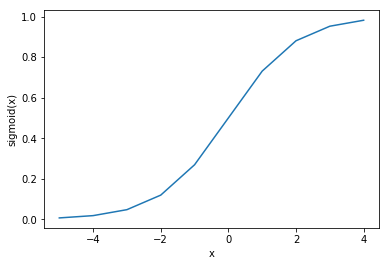

In [16]:
import numpy as np
x = range(-5, 5)

def sigmoid(inputs):
    return [1 / float(1 + np.exp(- x)) for x in inputs]
     
y_sigmoid = sigmoid(x)
line_graph(x, y_sigmoid, "x", "sigmoid(x)")

- Hyperbolic tangent

$$\phi(x) = \tanh(x)$$

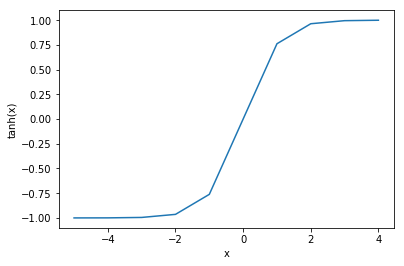

In [17]:
def tanh(inputs):
    values = [ np.tanh(x) for x in inputs]
    return values

y_tanh = tanh(x)
line_graph(x, y_tanh, "x", "tanh(x)")

- Rectified Linear Unit fuction (ReLU)

$$\phi(x) = x I_{x \ge 0}$$

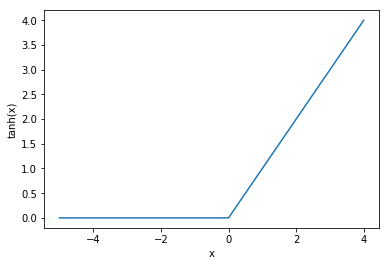

In [18]:
def ReLU(inputs):    
    values = [x if x>0 else 0 for x in inputs]
    return values

y_relu = ReLU(x)
line_graph(x, y_relu, "x", "tanh(x)")

### Activation functions for the output layer

- Sigmoid

$$\phi(x) = \frac{1}{1 + \exp(-x)}$$

- Softmax

$$\phi(x)_k = \frac{\exp(- x_k)}{\sum_{i=1}^K \exp(-x_i)}$$

- Linear

$$\phi(x) = x$$

In [20]:
def softmax(inputs):
    exp_inputs = np.exp(inputs)
    out = np.divide (exp_inputs, exp_inputs.sum())
    return out

softmax([1, 0.5, 2])

array([ 0.2312239 ,  0.14024438,  0.62853172])

### Error functions

-  Mean Squared Error (MSE), for regression 

$$ E = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

In [21]:
def mse(y, yhat):
    y = np.array(y)
    yhat = np.array(yhat)
    out = np.sum((y-yhat)**2)/len(y)
    return out

y=[1,0,1,1]
yhat=[0.4,0.6,0.1,0.5]
round(mse(y, yhat),2)

0.44

-  Cross-entropy, for classification

$$ E = - \frac{1}{n}\sum_{i=1}^n  \left( y_i \log(\hat{p}_i) + (1- y_i) \log(1-\hat{p}_i) \right)$$

In [22]:
def cross_entropy(y, p):
    y = np.array(y)
    p = np.array(p)
    out = - (np.dot(y, np.log(p)) + np.dot(1-y, np.log(1-p)))
    return out

y=[1,0,1,1]
p=[0.4,0.6,0.1,0.5]
print(round(cross_entropy(y, p),2))

4.83


### Backpropagation

During **Backpropagation** we compute backwards (right to left) and update the weights to minimize the error.

![alt text](pics/backprop.png)

### Gradient Descent

Generally, **gradient** of a function $E(x_1,...,x_n)$

$$\nabla_{(x_1,...,x_n)} E =  \begin{pmatrix} \frac{\partial E}{\partial x_1} \\ ... \\ \frac{\partial E}{\partial x_n} \end{pmatrix}$$

is a vector in the direction of the fastest growth of a function. Since our aim is to minimize the error, we are interested to find $- \nabla E$: it indicates in which direction the function decreases the most.

It follows, that a good way to update the weights is

$$ W^{new} = W^{old} + \nabla_W (-E).$$

Anyhow, if the size of the step $\nabla_W (-E)$ is too small or too large, it may take too long to find the minimum, we may get stuck in a local minimum or overshoot. To adjust, a **learning rate** $\alpha$ is introduced.

### Weights update

$$ W^{new} = W^{old} + \alpha \nabla_W (-E),$$

where $\alpha$ is the learning rate, i.e. the step size and $\nabla_W E$ denotes the gradient of the error function with repect to the parameters $W$. This can be also written as

$$ W^{new}_{ij} = W^{old}_{ij} + \alpha \left( -\frac{\partial E}{\partial W_{ij}} \right).$$

It is not uncommon to use the notation
$$\delta_{ij} = \frac{\partial y}{\partial W_{i,j}}.$$

Then
$$\frac{\partial E}{\partial W_{ij}} = \frac{\partial E}{\partial y} \frac{\partial y}{\partial W_{ij}} = \delta_{ij} \frac{\partial E}{\partial y}.$$

Applying the chain rule

$$\delta_{ij} = \frac{\partial y}{\partial W_{ij}} = \sum_{k=1}^{n} \frac{\partial \Phi}{\partial h_k} \frac{\partial h_k}{\partial W_{ij}},$$

i.e. we need to sum over all paths between $W_{ij}$ and $y$.

### Useful derivatives

- Sigmoid

$$\sigma'(x) = \frac{\partial}{\partial x} \frac{1}{1 + \exp(-x)} = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \sigma(x) \left(1- \sigma'(x) \right).$$

- Hyperbolic tangent

$$\tanh'(x) = 1 -\tanh^2(x).$$

- Rectified Linear Unit

$$\text{ReLU}'(x) = I_{x \ge 0}$$

### Calculations for perceptron

Now, when we understand the general workflow, let us construct the training algorithm for one perceptron with sigmoid activation function (performing logistic regression).

![alt text](pics/perceptron.png)

The goal is to minimize the error function, which is the mean point-wise error over $m$ training inputs

$$E = \frac{1}{m} \sum E_k,$$
$$E_k = - (y_k \ln(\hat{p_k}) + (1-y_k) \ln(1- \hat{p_k})).$$

The predicted probabilities are evaluated via the activation function 
$$\hat{p_k} = \sigma(x_k^T W + b).$$

Let us drop the index for now and perform computations for one observation

$$E = - (y \ln(\hat{p}) + (1-y) \ln(1- \hat{p})).$$

We need to find $\frac{\partial E}{\partial W_i}$ (here denote $W_{i1}$ as $W_i$ and consider $\frac{\partial E}{\partial b}$ be the particular case of $\frac{\partial E}{\partial W_i}$). 


Beforehand, compute 
$$  \frac{\partial \hat{p}}{\partial W_i} = \frac{\partial}{\partial W_i}\sigma(x^T W + b) = \hat{p} (1-\hat{p}) x_i. $$

Then
$$
\begin{aligned}
  \frac{\partial E}{\partial W_i} &=  - \left(y \frac{\partial}{\partial W_i} \ln(\hat{p}) + (1-y) \frac{\partial}   {\partial W_i} \ln(1- \hat{p}) \right) \\
  &= - \left(y \frac{1}{\hat{p}} \frac{\partial \hat{p}}{\partial W_i} + (1-y) \frac{1}{1-\hat{p}} \frac{\partial (-\hat{p})}   {\partial W_i}  \right) = \text{(substitute from above)} \\
  &= - (y - \hat{p}) x_i,
 \end{aligned}
$$
and it follows, in particular,
$$
\frac{\partial E}{\partial b} = - (y - \hat{p}).
$$

#### Logistic regression training algorithm
- initialize randomly weights $W$ and bias $b$
- repeat until the error is small:
  - compute prediction $\hat{p}_i$ for each training input $x_i$,
  - update weights and bias.


### Perceptron implementation

In [14]:
# useful functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
# Generate data:
# assume the line W1*x1+W*x2 separates the two regions: {y=1}, {y=0}
# b = 0

import numpy as np

#number of features
n_features = 2
n_classes = 1

#number of observations
m = 100

# generate features
Xsim = np.random.normal(0, 10, size=(m,n_features))

# set the values of true parameters
W_true = np.array([1.0, 3.0])
W_true.shape = (n_features,n_classes)

# fill the lables
ysim = np.zeros(shape=(m,n_classes))
for i in range(m):
    if sigmoid(np.dot(Xsim[i,:], W_true))>0.5:
        ysim[i] = 1

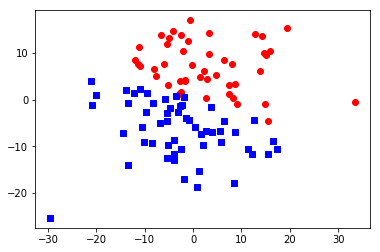

In [16]:
# plot
Xred = Xsim[np.argwhere(ysim==1),:]
Xblue = Xsim[np.argwhere(ysim==0),:]
plt.plot(Xred[:,0,0], Xred[:,0,1], 'ro', Xblue[:,0,0], Xblue[:,0,1], 'bs')

# TO DO: increase the number of observations and observe the changes on the plot. 
# How will the number of observations impact the predictions?

In [17]:
def compute_probs(X, W):
    return sigmoid(np.dot(X, W))

In [18]:
# training hyperparameters
epochs = 100
learning_rate = 0.001

# initialize weights and bias
W = np.random.normal(0, 1, size=W_true.shape)

In [19]:
# train
for epoch in range(epochs):
    probs = compute_probs(Xsim, W)
    d_error = -(ysim - probs)
    W -= learning_rate * np.dot(Xsim.T, d_error)
    #b -= learning_rate * d_error
    
    # print every 10 epochs
    if (epoch + 1) % 10 == 0:
        print('epoch:{:4d},  W[0]: {:5f},  W[1]: {:5f}'.format(epoch + 1, float(W[0]), float(W[1])))

epoch:  10,  W[0]: 0.194064,  W[1]: 0.543439
epoch:  20,  W[0]: 0.246185,  W[1]: 0.689785
epoch:  30,  W[0]: 0.280701,  W[1]: 0.789630
epoch:  40,  W[0]: 0.306962,  W[1]: 0.867437
epoch:  50,  W[0]: 0.328356,  W[1]: 0.932064
epoch:  60,  W[0]: 0.346525,  W[1]: 0.987826
epoch:  70,  W[0]: 0.362396,  W[1]: 1.037175
epoch:  80,  W[0]: 0.376543,  W[1]: 1.081649
epoch:  90,  W[0]: 0.389350,  W[1]: 1.122277
epoch: 100,  W[0]: 0.401086,  W[1]: 1.159787


In [20]:
# TO DO:
# Change the number of epochs and the learning rate and observe what happens to the output.
# Ideally we want to see, that the values converge to W_true.
# Hint: without changing the learning rate, try epochs = 1000.

# TO DO AT HOME:
# adjust the code to account for bias

# TO DO AT HOME:
# implement perceptron as class

### Batching

Previously we assumed that weights are updated after each calculation of the output. The updates can be made every $N$ steps. Then $N$ is called the batch-size.

$$\delta = \frac{1}{N} \sum \delta_{ij}.$$

As the result, we will perform less computations to save time and average the noise out to improve convergence.

### Dropout

Dropout is a regularization method.

If one part of a neural network has very large weights, it will dominate the training proces. As a solution, some nodes are being switched off randomly with a probability of the dropout for one training epoch.

Once we understood how DL works, there is no need to code up everything by hand, but use existing frameworks instead.

**Tensorflow**: a low level framework, we need to operate on the linear algebra level. 

A simple example: https://github.com/elizavetasemenova/amld-2018/blob/master/afternoon/ses3/Liza_afternoon.ipynb


**Keras** is a high level framework and allows to simply define the layers. Keras wraps TensorFlow and uses it as an execution backened.

Choices to make for the architechture and the values of hyperparameters:
    * number of layers
    * sizes of the layers
    * number of epochs
    * batch size
    * Activation function (sigmoid, relu, tanh, softmax)
    * Loss function (binary_crossentropy, categorical_crossentropy, mean_squared_error)
    * Optimizer (rmsprop, adam, ada)
    * Dropout probability

In [21]:
# generate the data

import numpy as np

#number of features
n_input = 2
n_classes = 1

#number of observations
m = 5000

# generate features
Xsim = np.random.normal(0, 10, size=(m, n_input))

# set the values of trrue parameters
W_true = np.array([1.0, 3.0])
#b_true = -1

# fill the true lables
ysim = np.zeros(shape=(m,n_classes))

s = np.dot(Xsim[1,:], W_true)
for i in range(m):
    if Xsim[i,0]**3/15 + Xsim[i,0]**2 -1 > Xsim[i,1]: # y = x^3/15 + x^2 - 1
        ysim[i] = 1

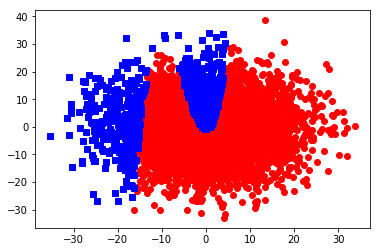

In [22]:
# plot
import matplotlib.pyplot as plt
Xred = Xsim[np.argwhere(ysim==1),:]
Xblue = Xsim[np.argwhere(ysim==0),:]
plt.plot(Xred[:,0,0], Xred[:,0,1], 'ro', Xblue[:,0,0], Xblue[:,0,1], 'bs')

In [23]:
# split X and y into train and test as 80% to 20%
train_portion = 0.8
train_m = round(m* train_portion)
print(train_m)
Xtrain = Xsim[0:train_m,]
Xtest = Xsim[train_m:,]
ytrain = ysim[0:train_m]
ytest = ysim[train_m:]

# check the shapes
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

4000
(4000, 2)
(1000, 2)
(4000, 1)
(1000, 1)


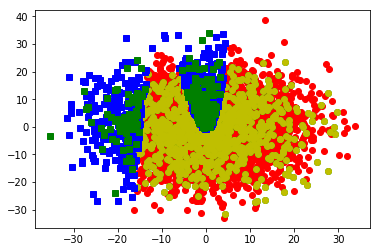

In [24]:
# plot again to see which points were picked as training- na test-examples
Xred = Xtrain[np.argwhere(ytrain==1),:]
Xorange = Xtest[np.argwhere(ytest==1),:]
Xblue = Xtrain[np.argwhere(ytrain==0),:]
Xgreen = Xtest[np.argwhere(ytest==0),:]
plt.plot(Xred[:,0,0], Xred[:,0,1],  'ro')
plt.plot(Xorange[:,0,0], Xorange[:,0,1],  'go')
plt.plot(Xorange[:,0,0], Xorange[:,0,1],  'yo')
plt.plot(Xblue[:,0,0], Xblue[:,0,1],  'bs')
plt.plot(Xgreen[:,0,0], Xgreen[:,0,1],  'gs')

In [25]:
from keras.models import Sequential
model = Sequential()

In [26]:
# Create the Sequential model

# model = Sequential()

# 1st Layer - a layer with the same input shape as the training examples in X
# creates nodes which each expect to receive 2-element vectors as inputs.
#model.add(Dense(3, input_dim=X.shape[1]))

# Add a softmax activation layer
#model.add(Activation('softmax'))

# 2nd Layer - Add a fully connected output layer
# model.add(Dense(1))

# Add a sigmoid activation layer
# model.add(Activation('sigmoid'))

In [27]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

In [28]:
n1 = 4 # size of the first hidden layer
n2 = 4 # size of the second hidden layer
dropout_prob = 0.1
model = Sequential()
model.add(Dense(n1, input_dim=n_input))
model.add(Activation('sigmoid'))
model.add(Dropout(dropout_prob))
model.add(Dense(n2))
model.add(Activation('sigmoid'))
model.add(Dense(n_classes))
model.add(Activation('sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 12        
_________________________________________________________________
activation_7 (Activation)    (None, 4)                 0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
activation_8 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_9 (Activation)    (None, 1)                 0         
Total para

The layers definitions can be also written in a more compact manner:

In [29]:
# create model
model = Sequential()
model.add(Dense(n1, input_dim=n_features, activation='sigmoid'))
model.add(Dense(n2, activation='sigmoid'))
model.add(Dense(n_classes, activation='sigmoid'))

In [30]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# Fit the model
model.fit(Xtrain, ytrain, epochs=30, batch_size=10)

Epoch 1/30
4000/4000 [==============================] - 2s 424us/step - loss: 0.5024 - acc: 0.8185
Epoch 2/30
4000/4000 [==============================] - 1s 364us/step - loss: 0.4541 - acc: 0.8185
Epoch 3/30
4000/4000 [==============================] - 1s 375us/step - loss: 0.4181 - acc: 0.8185
Epoch 4/30
4000/4000 [==============================] - 2s 398us/step - loss: 0.3903 - acc: 0.8185
Epoch 5/30
4000/4000 [==============================] - 1s 350us/step - loss: 0.3659 - acc: 0.8185
Epoch 6/30
4000/4000 [==============================] - 1s 341us/step - loss: 0.3450 - acc: 0.8185
Epoch 7/30
4000/4000 [==============================] - 2s 408us/step - loss: 0.3272 - acc: 0.8217
Epoch 8/30
4000/4000 [==============================] - 2s 440us/step - loss: 0.3127 - acc: 0.8600
Epoch 9/30
4000/4000 [==============================] - 2s 395us/step - loss: 0.2999 - acc: 0.8767
Epoch 10/30
4000/4000 [==============================] - 2s 387us/step - loss: 0.2881 - acc: 0.8810
Epoch 11/

In [32]:
# evaluate the model
scores = model.evaluate(Xtest, ytest)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1000/1000 [==============================] - 0s 69us/step

acc: 96.00%


Conclusion: occuracy tends to get better with deeper nets.

We are now one step away from training models on text data, for tasks such as, for instance, sentiment analysis. See an example [here:](https://www.liip.ch/en/blog/sentiment-detection-with-keras-word-embeddings-and-lstm-deep-learning-networks)


<img src="pics/sentimentKeras.png" alt="sentimentKeras" style="width: 400px;"/>